In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%pwd

u'/Users/travis/Documents/hackathons/tmobile-hackathon/notebooks'

In [7]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.ensemble as ens

## Collect and review data, eliminate columns which do not pertain to phone loans

In [105]:
loans = pd.read_csv('../data/loan.csv')

In [106]:
,'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint'
,'dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal'
,'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il'
,'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim'
,'inq_fi','total_cu_tl','inq_last_12m'

"'inq_fi','total_cu_tl','inq_last_12m'"

In [107]:
dropcols = ['id', 'member_id', 'funded_amnt_inv', 'grade', 'sub_grade', 'verification_status',
           'url', 'desc', 'title' , 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
            'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal'
           'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_pymnt',
           'total_pymnt_inv','total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries',
            'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d',
            'last_credit_pull_d','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint'
            ,'dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal'
            ,'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il'
            ,'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim'
            ,'inq_fi','total_cu_tl','inq_last_12m'
                   ]
dropcols = set(dropcols)
keep_cols = []
for col in loans.columns:
    if col not in dropcols:
        keep_cols.append(col)

In [334]:
loans_clean_['out_prncp_inv'].value_counts().nlargest(25)

0.00        47521
10000.00      278
15000.00      230
12000.00      227
20000.00      215
35000.00      202
24000.00      145
8000.00       144
25000.00      131
16000.00      126
5000.00       124
18000.00      116
30000.00      112
6000.00       112
28000.00       94
9506.26        76
8752.95        68
9743.18        65
14000.00       64
9519.25        63
21000.00       61
11407.51       60
9757.63        59
9256.86        57
9226.13        55
Name: out_prncp_inv, dtype: int64

In [329]:
loans_clean_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193647 entries, 13 to 887378
Data columns (total 15 columns):
loan_amnt              193647 non-null float64
funded_amnt            193647 non-null float64
term                   193647 non-null object
int_rate               193647 non-null float64
installment            193647 non-null float64
emp_title              193647 non-null object
emp_length             193647 non-null object
home_ownership         193647 non-null object
annual_inc             193647 non-null float64
zip_code               193647 non-null category
revol_bal              193647 non-null float64
initial_list_status    193647 non-null object
out_prncp              193647 non-null float64
out_prncp_inv          193647 non-null float64
year                   193647 non-null int64
dtypes: category(1), float64(8), int64(1), object(5)
memory usage: 22.5+ MB


In [114]:
y_cols = ['delinq_2yrs']
# 'delinq_2yrs' The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

purpose_keeprows = ['small_business', 'credit_card', 'other']


loans_ = loans[keep_cols]
loans_clean = loans_[loans_['purpose'] == 'credit_card']
loans_clean.dropna(inplace=True)
loans_y = loans_clean.pop('delinq_2yrs')

## remove the word months from term
## change 'issue_d' to day of week or month to see if it helps

/Users/travis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [115]:
loans_y_bin = loans_y.apply(lambda x: 1 if x > 1 else 0)

## Clean data which remains make sure it's numeric, and add dummy variables where needed

In [116]:
# atonum = {l:n for n, l in enumerate('abcdefghijklmnopqrstuv'.upper())}

In [118]:
loans_clean_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193647 entries, 13 to 887378
Data columns (total 18 columns):
loan_amnt              193647 non-null float64
funded_amnt            193647 non-null float64
term                   193647 non-null object
int_rate               193647 non-null float64
installment            193647 non-null float64
emp_title              193647 non-null object
emp_length             193647 non-null object
home_ownership         193647 non-null object
annual_inc             193647 non-null float64
loan_status            193647 non-null object
pymnt_plan             193647 non-null object
purpose                193647 non-null object
zip_code               193647 non-null object
revol_bal              193647 non-null float64
initial_list_status    193647 non-null object
out_prncp              193647 non-null float64
out_prncp_inv          193647 non-null float64
application_type       193647 non-null object
dtypes: float64(8), object(10)
memory usage: 28.1+ M

In [337]:
loans_clean_ = loans_clean.copy()
loans_clean_['issue_d'] = loans_clean['issue_d'].apply(pd.Timestamp)
loans_clean_['year'] = loans_clean_['issue_d'].apply(lambda x: x.year)
loans_clean_['zip_code'] = loans_clean_['zip_code'].astype('category')
loans_clean_.drop(['application_type', 'purpose', 'initial_list_status', 'revol_bal',
                  'out_prncp_inv', 'revol_bal', 'pymnt_plan', 'issue_d', 'loan_status'], axis=1, inplace=True)

In [338]:
rows_need_dummies = ['emp_title',
                     'home_ownership', 'emp_length', 'term', 'zip_code']

In [339]:
def make_dummy(df, cols):
    df_ = df.copy()
    for col in cols:
        for value in df[col].value_counts().nlargest(50).index:
            df_['{}${}'.format(col, value)] = df[col] == value
        df_.drop(col, axis=1, inplace=True)
    return df_

In [340]:
loans_model = make_dummy(loans_clean_, rows_need_dummies)

## Train logistic regression Classifier

In [341]:
Xtr, Xte, ytr, yte = ms.train_test_split(loans_model, loans_y_bin, test_size= .15)

In [342]:
model = lm.LogisticRegression(max_iter=400,  C=.75, n_jobs=-1)

In [343]:
model.fit(Xtr, ytr)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [344]:
probs = model.predict_proba(Xte)
probs = probs[:,1]

In [345]:
def generate_roc_curve(probs, yte, n_iter= 200):
    '''
    '''
    thres_list = np.linspace(0,1,n_iter)
    thres_list = (thres_list * thres_list)
    rocs = []
    test = yte.reshape(-1,1)
    proba = probs.reshape(-1,1)
    pframe = pd.DataFrame(np.append(proba, test, axis=1), columns= ['predict', 'label'])
    c_true = pframe[pframe['label'] == 1]
    c_false = pframe[pframe['label'] != 1]
    for thres in thres_list:
        tpr = float((c_true['predict'] > thres).sum()) / c_true.shape[0]
        fpr = float((c_false['predict'] > thres).sum()) / c_false.shape[0]
        rocs.append({'tpr' : tpr, 'fpr': fpr})
    return rocs

In [346]:
# loans_clean_[out_prncp_inv].nlargest()

In [347]:
rocs = generate_roc_curve(probs, yte, n_iter=2000)

In [348]:
colors = itertools.cycle(['green', 'red', 'cyan', 'orange', 'violet',
                          'yellow', 'blue', 'pink'])

2000


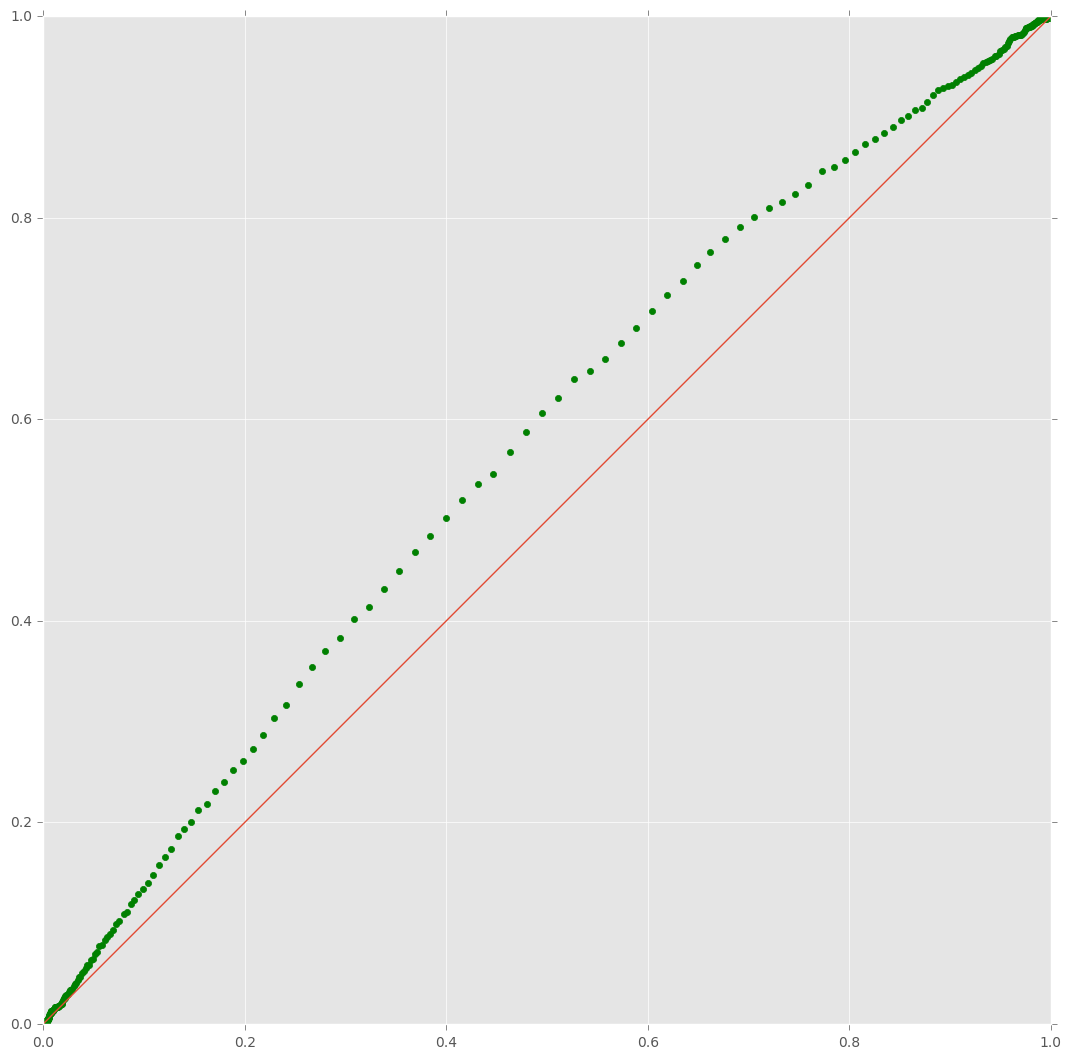

In [349]:
fig, ax = plt.subplots(1, 1, figsize=(13, 13))
fpr = []
tpr = []
for row in rocs:
    fpr.append(row['fpr'])
    tpr.append(row['tpr'])
print len(fpr)
ax.scatter(fpr, tpr, color=colors.next())
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10))
ax.set_xlim(0,1)
ax.set_ylim(0,1)

fig.savefig('../images/reducedROC.png')


In [350]:
col_vals = pd.DataFrame(model.coef_, columns=loans_model.columns)

In [379]:
nomoney = [col for col in col_vals if '$' not in col]
money = set([col.split('$')[0] for col in col_vals if '$' in col])
hella_money = [col for col in col_vals if '$' in col]

In [358]:
col_vals[nomoney].T

,0
loan_amnt,-0.000387
funded_amnt,0.000339
int_rate,0.000133
installment,0.001037
annual_inc,0.000002
out_prncp,0.000021
year,-0.001452


In [364]:
nomoney

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'out_prncp',
 'year']

In [363]:
money

{'emp_length', 'emp_title', 'home_ownership', 'term', 'zip_code'}

In [368]:
div = '--------'

In [384]:
nomoney

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'out_prncp',
 'year']

In [385]:
money

{'emp_length', 'emp_title', 'home_ownership', 'term', 'zip_code'}

In [371]:
print 'continous cols'
print div

for i in nomoney:
    print i

print div
print 'drop menu cols'
print div

for i in money:
    print i

continous cols
--------
loan_amnt
funded_amnt
int_rate
installment
annual_inc
out_prncp
year
--------
drop menu cols
--------
home_ownership
term
zip_code
emp_title
emp_length


In [381]:
print 'pulldown_values'
print div

ilast = 'lkhglhar'
for i in hella_money:
    mcol = i.split('$')
    if mcol[0] != ilast:
        print div
        print mcol[0]
        print div
        ilast = mcol[0]
    print mcol[1]

pulldown_values
--------
--------
emp_title
--------
Teacher
Manager
Owner
RN
Registered Nurse
Supervisor
Project Manager
Sales
Office Manager
Director
General Manager
Driver
Attorney
teacher
President
Engineer
manager
Vice President
owner
Accountant
driver
Administrative Assistant
Sales Manager
Operations Manager
Account Manager
Analyst
Software Engineer
sales
Controller
Store Manager
Police Officer
Executive Assistant
supervisor
Consultant
Paralegal
Account Executive
Technician
Server
Program Manager
Professor
Nurse
Branch Manager
truck driver
IT Manager
Business Analyst
CEO
Associate
Assistant Manager
Executive Director
Truck Driver
--------
home_ownership
--------
MORTGAGE
RENT
OWN
OTHER
NONE
--------
emp_length
--------
10+ years
2 years
< 1 year
3 years
1 year
5 years
4 years
7 years
8 years
6 years
9 years
n/a
--------
term
--------
 36 months
 60 months
--------
zip_code
--------
606xx
112xx
750xx
100xx
945xx
900xx
070xx
300xx
331xx
770xx
330xx
921xx
891xx
917xx
104xx
117xx
926